In [9]:
#run in python 3.10.7 on windows
import pandas as pd
import numpy as np

%matplotlib inline

auckland_rain = pd.read_csv('../data/niwa_cleaned/niwaDailyWeatherData.csv', parse_dates=['Date(NZST)'])
auckland_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         945 non-null    int64         
 1   Date(NZST)         945 non-null    datetime64[ns]
 2   Pmsl(hPa)          945 non-null    float64       
 3   Pstn(hPa)          945 non-null    float64       
 4   Amount(mm)         945 non-null    float64       
 5   Rainfall(mm)       945 non-null    float64       
 6   Deficit(mm)        945 non-null    float64       
 7   Sunshine(Hrs)      945 non-null    float64       
 8   WindDir(DegT)      945 non-null    int64         
 9   Speed(m/s)_x       945 non-null    float64       
 10  WindDir StdDev     945 non-null    int64         
 11  WindSpd StdDev     945 non-null    float64       
 12  Tmax(C)            945 non-null    float64       
 13  Tmin(C)            945 non-null    float64       
 14  Tgmin(C)  

<Axes: xlabel='Date(NZST)'>

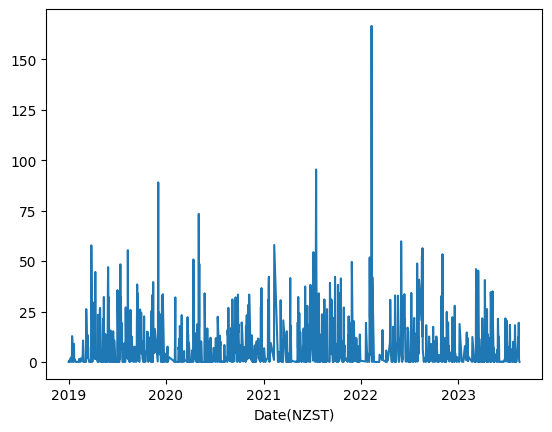

In [10]:
auckland_rain.index = pd.to_datetime(auckland_rain['Date(NZST)']).dt.date
auckland_rain['Rainfall(mm)'].plot()

<Axes: xlabel='Date(NZST)'>

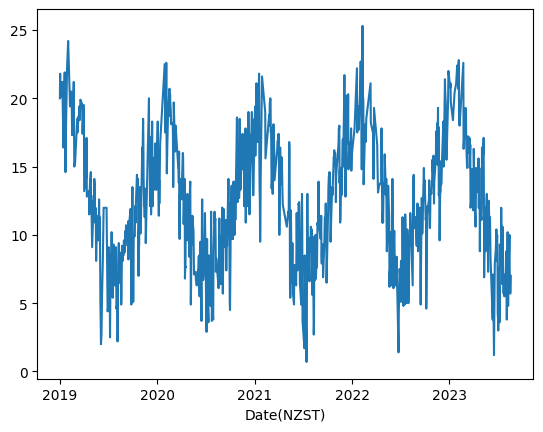

In [11]:
auckland_rain['Tmean(C)'].plot()

In [12]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from sklearn.metrics import mean_squared_error


In [13]:
auckland_rain.head()

,Unnamed: 0,Date(NZST),Pmsl(hPa),Pstn(hPa),Amount(mm),Rainfall(mm),Deficit(mm),Sunshine(Hrs),WindDir(DegT),Speed(m/s)_x,...,RH(%),Tdew(C),Dir(DegT),Speed(m/s)_y,Percent(%),Depth(cm),soil_avg_moist,soil_min_moist,soil_max_moist,soil_median_moist
Date(NZST),,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,2019-01-01,1016.5,993.2,0.75,0.0,40.7,5.3,313,0.5,...,82,14.9,188,6.2,40.9,20,40.9,40.9,40.9,40.9
2019-01-02,1,2019-01-02,1013.6,990.5,0.15,0.6,44.6,2.2,5,0.6,...,82,16.5,13,6.2,40.4,20,40.4,40.4,40.4,40.4
2019-01-03,2,2019-01-03,1011.3,988.2,0.10,0.0,49.2,8.6,263,0.5,...,82,16,201,8.8,40.5,20,40.5,40.5,40.5,40.5
2019-01-06,3,2019-01-06,1016.2,992.9,1.32,0.0,62.8,7.4,310,0.9,...,88,16.6,353,9.8,37.2,20,37.2,37.2,37.2,37.2
2019-01-07,4,2019-01-07,1019.2,995.6,0.28,1.6,65.7,10.3,168,2.8,...,68,10.1,162,9.3,36.6,20,36.6,36.6,36.6,36.6


In [14]:
# Summary Statistics
print(auckland_rain.describe())

       Unnamed: 0                     Date(NZST)    Pmsl(hPa)    Pstn(hPa)  \
count  945.000000                            945   945.000000   945.000000   
mean   472.000000  2021-04-23 13:33:42.857143040  1014.103386   990.160635   
min      0.000000            2019-01-01 00:00:00   978.100000   954.800000   
25%    236.000000            2020-02-29 00:00:00  1007.900000   984.300000   
50%    472.000000            2021-05-08 00:00:00  1014.500000   990.700000   
75%    708.000000            2022-06-24 00:00:00  1020.700000   996.800000   
max    944.000000            2023-08-19 00:00:00  1041.500000  1016.200000   
std    272.942302                            NaN     9.725952     9.440421   

       Amount(mm)  Rainfall(mm)  Deficit(mm)  Sunshine(Hrs)  WindDir(DegT)  \
count  945.000000    945.000000   945.000000     945.000000     945.000000   
mean     6.592095      8.774815    15.634180       3.178836     179.564021   
min    -33.000000      0.000000     0.000000       0.000000    

In [15]:
# Data Visualization
import matplotlib.pyplot as plt

# Time series plot of rainfall
plt.figure(figsize=(12, 6))
plt.plot(auckland_rain['date'], auckland_rain['rainfall(mm)'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time')
plt.legend()
plt.show()

KeyError: 'date'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Histograms
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=auckland_rain, x='rainfall(mm)', bins=30, kde=True)
plt.xlabel('Rainfall (mm)')
plt.title('Distribution of Rainfall')
plt.show()

ValueError: Could not interpret value `rainfall(mm)` for parameter `x`

<Figure size 1200x600 with 0 Axes>

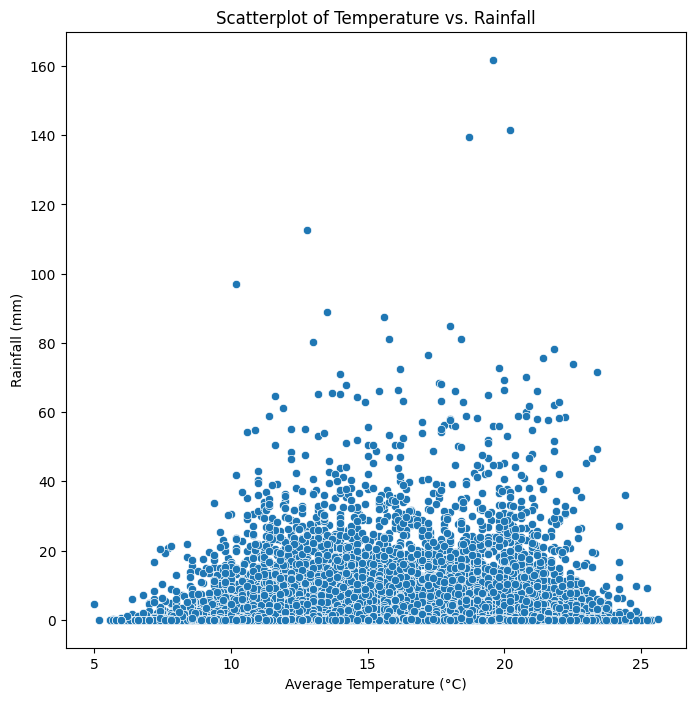

In [ ]:
# Scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=auckland_rain, x='tavg', y='rainfall(mm)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatterplot of Temperature vs. Rainfall')
plt.show()

In [ ]:
# Handling Missing Data
missing_data = auckland_rain.isnull().sum()
print(missing_data)

date            0
rainfall(mm)    0
tavg            0
tmax            0
tmin            0
dtype: int64


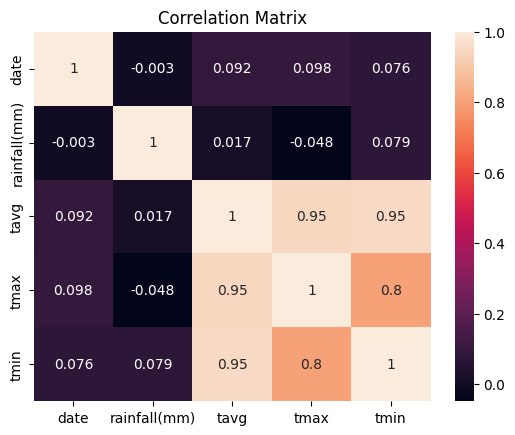

In [ ]:
# Correlation Analysis
correlation_matrix = auckland_rain.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_days = 7
for i in range(1, lag_days + 1):
    for column in ['rainfall(mm)', 'tavg', 'tmax', 'tmin']:
        auckland_rain[f'lag_{column}_{i}'] = auckland_rain[column].shift(i)

# Drop rows with NaN values due to lag features
auckland_rain.dropna(inplace=True)

auckland_rain.head(5)

,date,rainfall(mm),tavg,tmax,tmin,lag_rainfall(mm)_1,lag_tavg_1,lag_tmax_1,lag_tmin_1,lag_rainfall(mm)_2,...,lag_tmax_5,lag_tmin_5,lag_rainfall(mm)_6,lag_tavg_6,lag_tmax_6,lag_tmin_6,lag_rainfall(mm)_7,lag_tavg_7,lag_tmax_7,lag_tmin_7
7,1966-01-08,1.3,19.7,22.1,17.3,5.1,20.0,23.7,16.3,8.9,...,23.5,17.1,26.2,20.5,23.9,17.1,0.0,18.0,22.2,13.9
8,1966-01-09,2.5,17.8,19.7,15.9,1.3,19.7,22.1,17.3,5.1,...,24.4,16.2,0.0,20.3,23.5,17.1,26.2,20.5,23.9,17.1
9,1966-01-10,0.0,16.2,18.0,14.4,2.5,17.8,19.7,15.9,1.3,...,23.4,17.8,0.0,20.3,24.4,16.2,0.0,20.3,23.5,17.1
10,1966-01-11,0.5,16.8,19.3,14.4,0.0,16.2,18.0,14.4,2.5,...,23.4,18.6,1.3,20.6,23.4,17.8,0.0,20.3,24.4,16.2
11,1966-01-12,0.5,18.0,20.5,15.6,0.5,16.8,19.3,14.4,0.0,...,23.7,16.3,8.9,21.0,23.4,18.6,1.3,20.6,23.4,17.8


In [ ]:
print(auckland_rain.columns)


Index(['date', 'rainfall(mm)', 'tavg', 'tmax', 'tmin', 'lag_rainfall(mm)_1',
       'lag_tavg_1', 'lag_tmax_1', 'lag_tmin_1', 'lag_rainfall(mm)_2',
       'lag_tavg_2', 'lag_tmax_2', 'lag_tmin_2', 'lag_rainfall(mm)_3',
       'lag_tavg_3', 'lag_tmax_3', 'lag_tmin_3', 'lag_rainfall(mm)_4',
       'lag_tavg_4', 'lag_tmax_4', 'lag_tmin_4', 'lag_rainfall(mm)_5',
       'lag_tavg_5', 'lag_tmax_5', 'lag_tmin_5', 'lag_rainfall(mm)_6',
       'lag_tavg_6', 'lag_tmax_6', 'lag_tmin_6', 'lag_rainfall(mm)_7',
       'lag_tavg_7', 'lag_tmax_7', 'lag_tmin_7'],
      dtype='object')


# LSTM

In [ ]:
# Standardize Data
target_scaler = StandardScaler()


# Reshape the data for LSTM
sequence_length = 30

X_sequences = []
y_target = []

for i in range(len(auckland_rain) - sequence_length):
    X_sequences.append(auckland_rain.iloc[i:i+sequence_length, 2:].values)  # Select columns with lag features
    y_target.append(auckland_rain.iloc[i + sequence_length]['rainfall(mm)'])  # Predict lag_rainfall_1


X_sequences = np.array(X_sequences)
y_target = np.array(y_target)

In [ ]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_target, test_size=0.2, random_state=42)

In [ ]:
# Build the LSTM model
# Fit the StandardScaler to your training data
target_scaler.fit(y_train.reshape(-1, 1))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the LSTM Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
520/520 [==============================] - 7s 11ms/step - loss: 125.6662 - val_loss: 49.7553
Epoch 2/50
520/520 [==============================] - 6s 11ms/step - loss: 56.2215 - val_loss: 47.3743
Epoch 3/50
520/520 [==============================] - 5s 11ms/step - loss: 56.4249 - val_loss: 47.0716
Epoch 4/50
520/520 [==============================] - 6s 11ms/step - loss: 55.6288 - val_loss: 46.8868
Epoch 5/50
520/520 [==============================] - 6s 11ms/step - loss: 55.3273 - val_loss: 46.9646
Epoch 6/50
520/520 [==============================] - 5s 10ms/step - loss: 55.1751 - val_loss: 46.8736
Epoch 7/50
520/520 [==============================] - 5s 10ms/step - loss: 54.9463 - val_loss: 46.7650
Epoch 8/50
520/520 [==============================] - 5s 10ms/step - loss: 54.6758 - val_loss: 46.3285
Epoch 9/50
520/520 [==============================] - 5s 10ms/step - loss: 54.8811 - val_loss: 46.3573
Epoch 10/50
520/520 [==============================] - 5s 10ms/step - lo

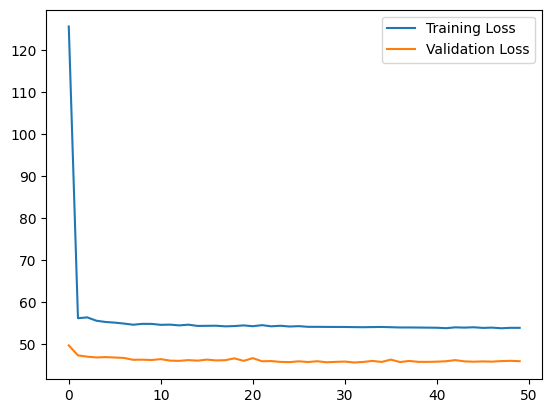

In [ ]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Make Predictions
y_pred_scaled = model.predict(X_test)

130/130 [==============================] - 1s 4ms/step


In [ ]:
# Inverse transform the predictions for the target variable
y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled)

# Reshape y_test
y_test = y_test.reshape(-1, 1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original_scale))
print("Root Mean Squared Error (RMSE):", rmse)

# Combine the 'date' column with the predictions
y_pred_original_scale = pd.DataFrame({'date': auckland_rain.iloc[-len(y_test):]['date'].values, 'rainfall(mm)': y_pred_original_scale.flatten()})


Root Mean Squared Error (RMSE): 23.456064051231444


In [ ]:
# Predict rainfall for tomorrow using the Random Forest model
lstm_predict_tomorrow = model.predict(X_test)
lstm_predict_day_after_tomorrow = model.predict(X_test)
lstm_predict_two_days_after_tomorrow = model.predict(X_test)

# Print the predictions
print(f'LSTM Prediction for tomorrow: {lstm_predict_tomorrow[0]} mm')
print(f'LSTM Prediction for the day after tomorrow: {lstm_predict_day_after_tomorrow[0]} mm')
print(f'LSTM Prediction for two days after tomorrow: {lstm_predict_two_days_after_tomorrow[0]} mm')

130/130 [==============================] - 1s 4ms/step
LSTM Prediction for tomorrow: [2.8966596] mm
LSTM Prediction for the day after tomorrow: [2.8966596] mm
LSTM Prediction for two days after tomorrow: [2.8966596] mm


In [ ]:
print(y_pred_scaled.shape)  # Check the shape of y_pred_scaled
print(y_test.shape)  # Check the shape of y_test

(4157, 1)
(4157, 1)


In [ ]:
# Calculate monthly median rainfall
monthly_median_rainfall = auckland_rain.groupby(auckland_rain['date'].dt.month)['rainfall(mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
auckland_rain['rainfall_percentage'] = (auckland_rain['rainfall(mm)'] / monthly_median_rainfall[auckland_rain['date'].dt.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
auckland_rain['weather_condition'] = auckland_rain['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(auckland_rain[['date', 'rainfall(mm)', 'rainfall_percentage', 'weather_condition']])



            date  rainfall(mm)  rainfall_percentage weather_condition
7     1966-01-08           1.3                  inf          Very wet
8     1966-01-09           2.5                  inf          Very wet
9     1966-01-10           0.0                  NaN          Very dry
10    1966-01-11           0.5                  inf          Very wet
11    1966-01-12           0.5                  inf          Very wet
...          ...           ...                  ...               ...
20814 2022-12-27           0.0                  NaN          Very dry
20815 2022-12-28           0.0                  NaN          Very dry
20816 2022-12-29           0.0                  NaN          Very dry
20817 2022-12-30           0.0                  NaN          Very dry
20818 2022-12-31           0.8                  inf          Very wet

[20812 rows x 4 columns]
